In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv("hotel_booking.csv")

# Understanding Data


In [3]:
Data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


In [4]:
Data.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.4,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.2,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [5]:
Data.shape

(119390, 36)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
Data.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.000000,0.370416,0.482918,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,119390.000000,104.011416,106.863097,0.000000,18.000000,69.000000,160.000000,737.000000
arrival_date_year,119390.000000,2016.156554,0.707476,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
arrival_date_week_number,119390.000000,27.165173,13.605138,1.000000,16.000000,28.000000,38.000000,53.000000
arrival_date_day_of_month,119390.000000,15.798241,8.780829,1.000000,8.000000,16.000000,23.000000,31.000000
stays_in_weekend_nights,119390.000000,0.927599,0.998613,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,119390.000000,2.500302,1.908286,0.000000,1.000000,2.000000,3.000000,50.000000
adults,119390.000000,1.856403,0.579261,0.000000,2.000000,2.000000,2.000000,55.000000
children,119386.000000,0.103890,0.398561,0.000000,0.000000,0.000000,0.000000,10.000000
babies,119390.000000,0.007949,0.097436,0.000000,0.000000,0.000000,0.000000,10.000000


# Data Cleaning & Preparation

In [9]:
Data[Data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [10]:
#Dropping Unwanted Columns 
Data.drop(['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company',
'days_in_waiting_list','required_car_parking_spaces','total_of_special_requests',],axis=1, inplace=True)

In [11]:
Data.isnull().sum().sort_values(ascending=False)

country                      488
children                       4
market_segment                 0
phone-number                   0
email                          0
name                           0
reservation_status_date        0
reservation_status             0
adr                            0
customer_type                  0
deposit_type                   0
assigned_room_type             0
reserved_room_type             0
distribution_channel           0
hotel                          0
is_canceled                    0
meal                           0
babies                         0
adults                         0
stays_in_week_nights           0
stays_in_weekend_nights        0
arrival_date_day_of_month      0
arrival_date_week_number       0
arrival_date_month             0
arrival_date_year              0
lead_time                      0
credit_card                    0
dtype: int64

<AxesSubplot:>

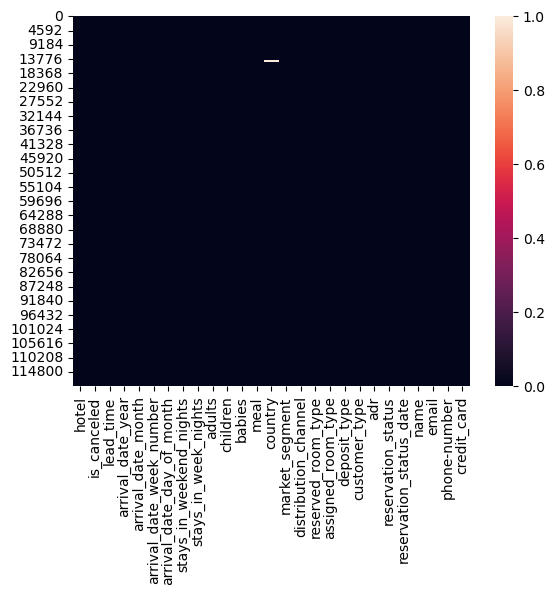

In [12]:
sns.heatmap(Data.isnull())

In [13]:
Data['country']=Data['country'].fillna(0)
Data['children']=Data['children'].fillna(0)                     

<AxesSubplot:>

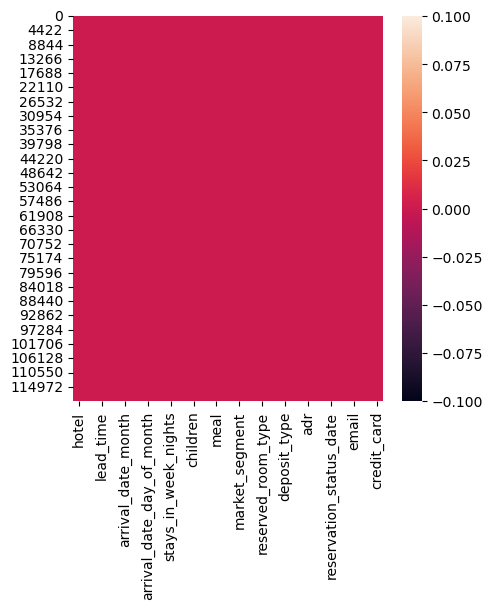

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(Data.isnull())

In [15]:
#changing datatype of reservation_status_date to datetime
Data['reservation_status_date'] = pd.to_datetime(Data['reservation_status_date'])
Data['Month']=Data['reservation_status_date'].dt.month

In [16]:
Data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'adr', 'reservation_status', 'reservation_status_date',
       'name', 'email', 'phone-number', 'credit_card', 'Month'],
      dtype='object')

# Data Visualization

<AxesSubplot:>

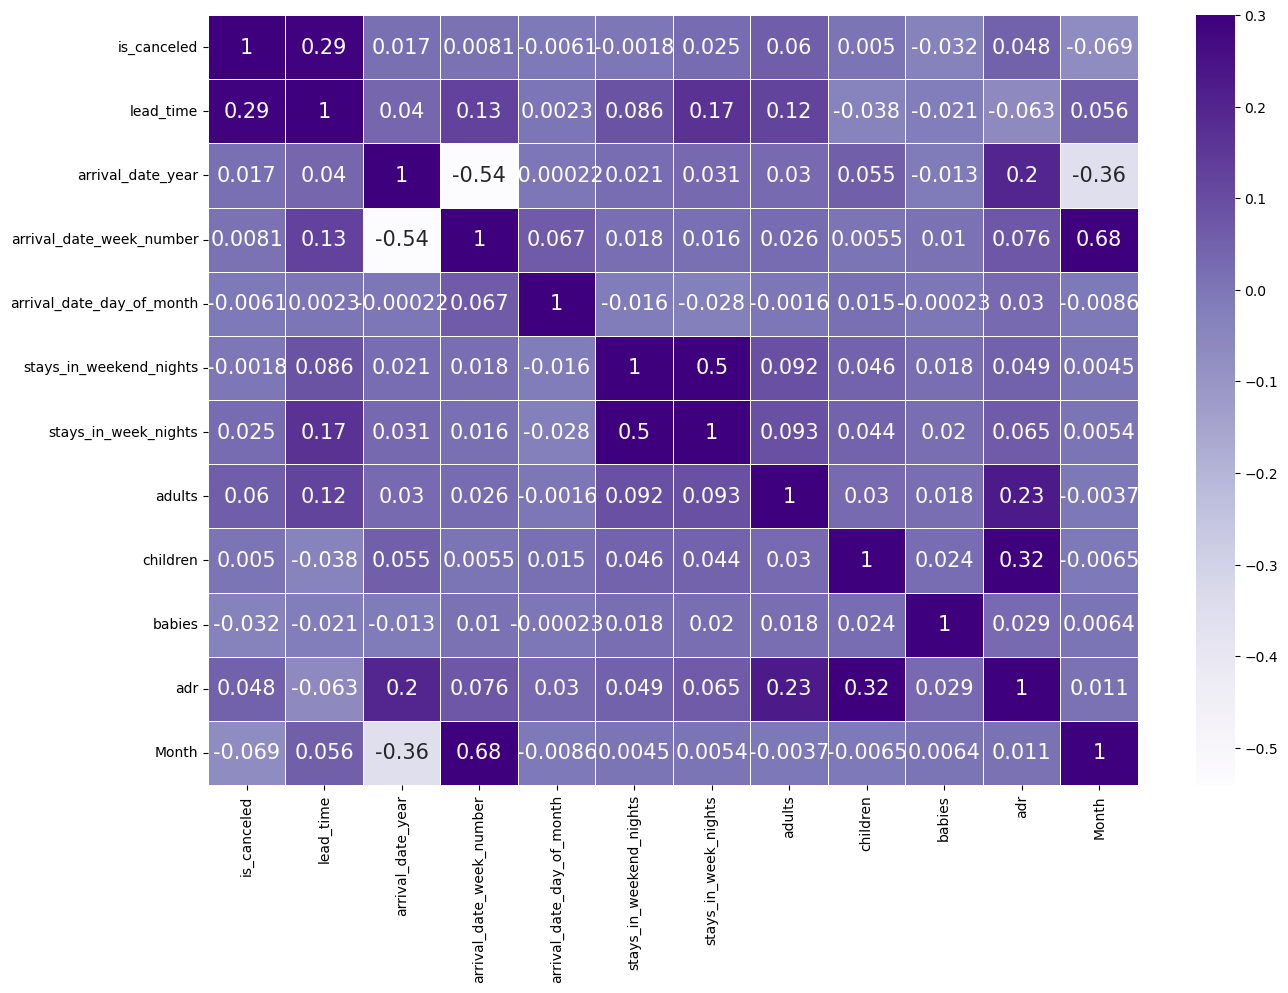

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(Data.corr(),cmap='Purples',  vmax=.3,linewidths=0.5,annot=True,annot_kws={"size": 15})

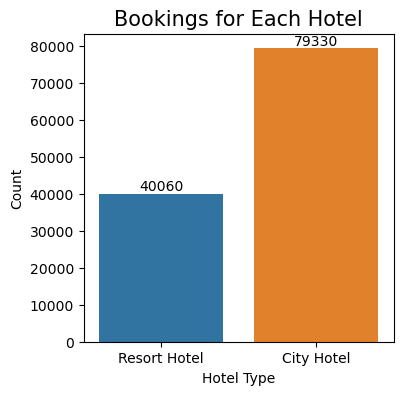

In [54]:
plt.figure(figsize=(4,4))
sns.countplot(data = Data , x = 'hotel')
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.title("Bookings for Each Hotel",size=15,color='black')
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

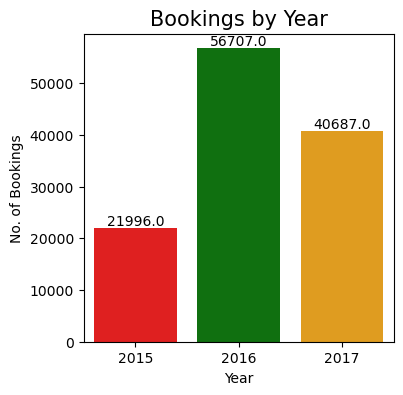

In [19]:
plt.figure(figsize=(4, 4))
Year_Booking = Data.groupby("arrival_date_year")["arrival_date_year"].count()
sns.barplot(x=Year_Booking.index, y=Year_Booking,palette=["Red", "Green", "Orange"])
plt.xlabel("Year")
plt.ylabel("No. of Bookings")
plt.title("Bookings by Year",size=15, color='black')
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

In [20]:
Month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

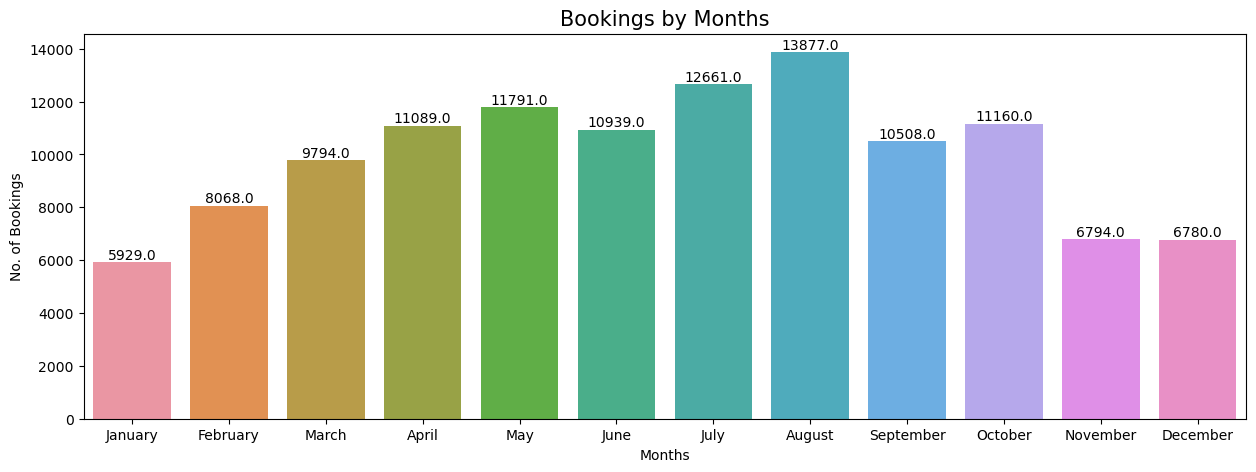

In [21]:
plt.figure(figsize=(15,5))
Month_Booking=Data.groupby("arrival_date_month")["arrival_date_month"].count()
sns.barplot(x=Month_Booking.index, y=Month_Booking, order=Month_names)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by Months",size=15, color='black')
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

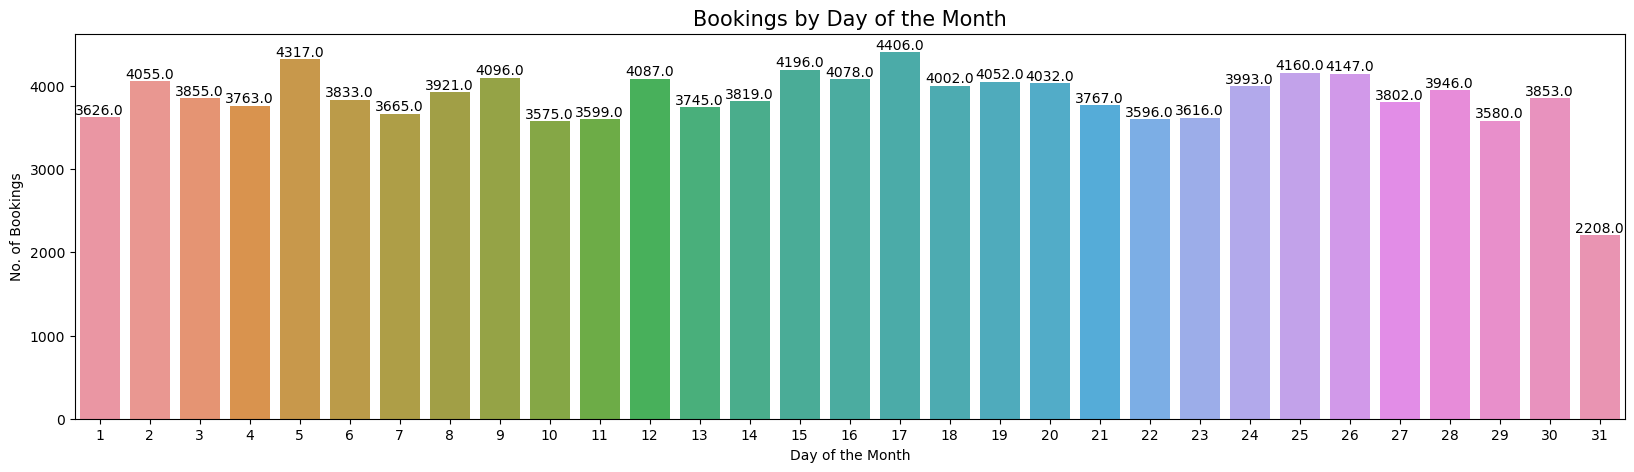

In [22]:
plt.figure(figsize=(20, 5))
Booking = Data.groupby("arrival_date_day_of_month")["arrival_date_day_of_month"].count()
sns.barplot(x=Booking.index, y=Booking)
plt.xlabel("Day of the Month")
plt.ylabel("No. of Bookings")
plt.title("Bookings by Day of the Month",size=15, color='black')
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

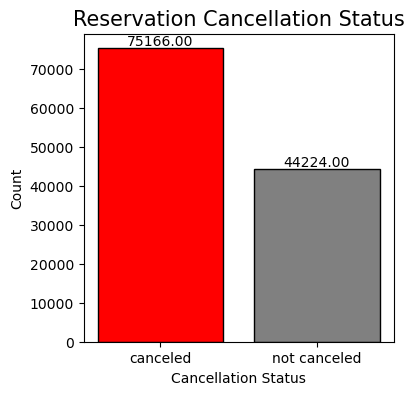

In [26]:
plt.figure(figsize=(4, 4))
Reservation = Data['is_canceled'].value_counts(normalize=True)
Reservation
plt.title("Reservation Cancellation Status", size=15, color='black')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
bar_plot=plt.bar(['canceled','not canceled'],Data['is_canceled'].value_counts(),color=['red', 'grey'],edgecolor='black')
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

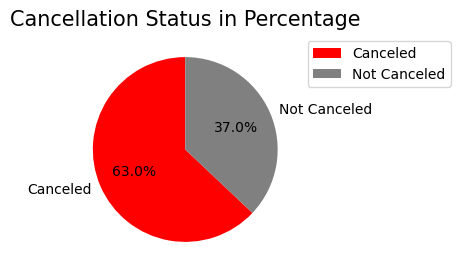

In [44]:
plt.figure(figsize=(3, 3))
D=Data['is_canceled'].value_counts()
plt.pie(D,labels=['Canceled','Not Canceled' ], autopct='%.1f%%', startangle=90, colors = [ 'red','grey'])
plt.title('Cancellation Status in Percentage', size=15, color='black')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

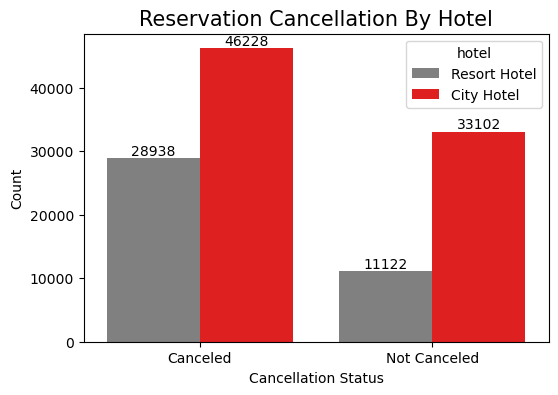

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'is_canceled', data=Data, hue='hotel',palette=['Grey', 'Red'])
plt.title("Reservation Cancellation By Hotel",size=15,color='black')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Canceled', 'Not Canceled'])
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

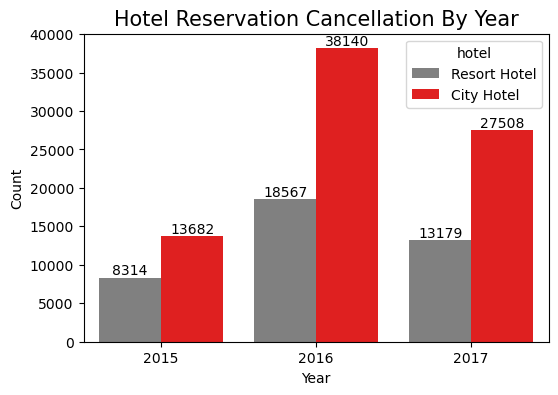

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'arrival_date_year', data=Data, hue='hotel',palette=['Grey', 'Red'])
plt.title("Hotel Reservation Cancellation By Year",size=15,color='black')
plt.xlabel('Year')
plt.ylabel('Count')
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

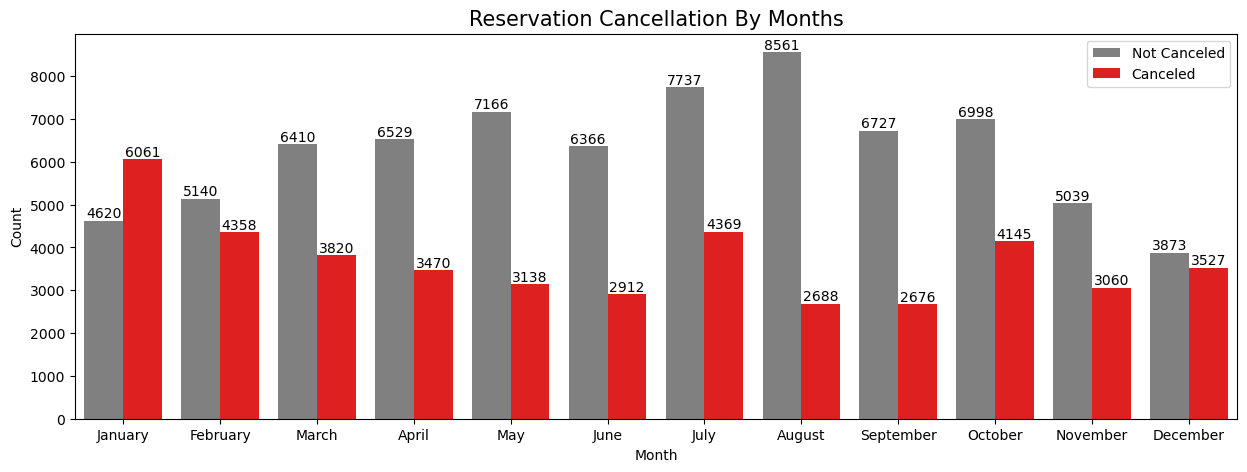

In [32]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Month', data=Data, hue='is_canceled',palette=['Grey', 'Red'])
plt.title("Reservation Cancellation By Months",size=15,color='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['Not Canceled','Canceled'])
plt.xticks(range(12), Month_names)
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()

In [33]:
C = Data['country'].value_counts()
C.describe()
Data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH

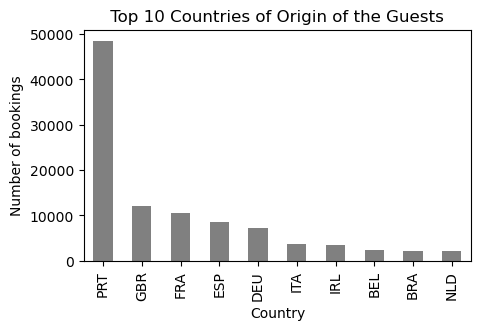

In [34]:
plt.figure(figsize=(5,3))
C.sort_values(ascending=False)[:10].plot(kind='bar',color='grey')
plt.xlabel("Country")
plt.ylabel("Number of bookings")
plt.title(" Top 10 Countries of Origin of the Guests ")
plt.show()

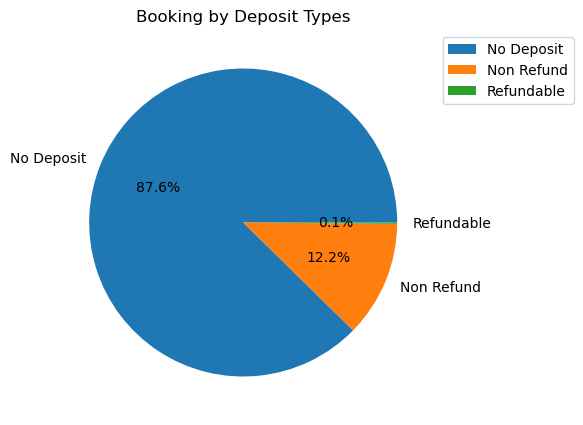

In [35]:
plt.figure(figsize=(5, 5))
deposit_counts = Data['deposit_type'].value_counts()
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%')
plt.title('Booking by Deposit Types')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

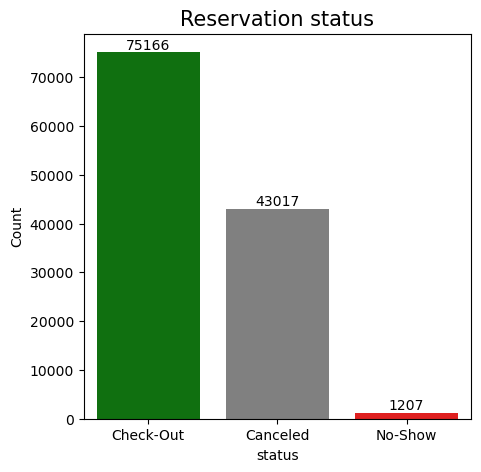

In [36]:
plt.figure(figsize=(5, 5))
sns.countplot(x='reservation_status', data=Data,palette=['green','Grey', 'Red'])
plt.title("Reservation status",size=15,color='black')
plt.xlabel('status')
plt.ylabel('Count')
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.show()